Considering A Dataset 'Data.csv' is present

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data.csv')

Checking Data

In [ ]:
df

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,Female,Bachelors,27,4,25535,2%,Divorced,West,Issues with the Manager
1,2,XYZ2490,ABC2,5-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,6-Apr-12,1. 9,Male,MBA,36,2,52155,45%,Single,South,More Challenging Job Roles/ Higher designation
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,7-Apr-12,1. 5,Male,Bachelors,24,4,26438,18%,Divorced,CENTRAL,Issues with the Manager
3,4,XYZ1679,ABC4,1 May 08,AM - Sales,M1,Yes,Admin Gujarat,3 Apr 12,3 .11,Male,Bachelors,33,2,54311,82%,Single,West,Lack of Growth
4,5,XYZ2378,ABC5,3 Mar 10,Sales Executive,E1,Yes,Jagdishpuram,10 Apr 12,2 .1,Male,Bachelors,24,4,26702,49%,Divorced,North,Issues with the Manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,323,XYZ1538,ABC323,26-May-08,AM - Sales,M1,Yes,Guntur,15 Mar 13,4 .9,Male,Bachelors,37,2,53841,69%,Divorced,South,Lack of Growth
323,324,XYZ3221,ABC324,13-Sep-12,Sales Executive,E1,Yes,Guntur,7 Mar 13,0. 5,Male,Bachelors,25,3,25813,11%,Married,South,Lack of Growth
324,325,XYZ0207,ABC325,12-Dec-05,Sr Sales Executive,E2,Yes,Guntur,12 Mar 13,7 .3,Male,Bachelors,28,1,36498,11%,Divorced,South,Lack of Growth
325,326,XYZ0183,ABC326,21-Jul-04,AM - Sales,M1,Yes,Guntur,31 Mar 13,8 .8,Male,Bachelors,36,3,51796,82%,Divorced,South,Termination - Poor Performance


Looking at what different features are available

In [ ]:
df.columns

Index(['S.No', 'EmpID', 'Emp Name', 'DOJ', 'Designation', 'Grade',
       'Attrition ', 'Location', 'In Active Date', 'Tenure', 'Gender',
       'Education', 'Age', 'Last Rating', 'Monthly Income',
       'Engagement Score (% Satisfaction)', 'Marital Status', 'Zone',
       'Remarks'],
      dtype='object')

Checking for null values

In [ ]:
df.isnull()

Let's try to see how does the people leaving the job compared to their age group

In [ ]:
uni_ele = df['Age'].unique()
uni_ele = np.sort(uni_ele)

In [ ]:
df_2 = df.groupby('Age')
len(df_2)

23

In [ ]:
df_2.get_group(27).shape

(54, 19)

In [ ]:
count_l = []
for i in uni_ele:
  count = df_2.get_group(i).shape[0]
  count_l.append(count)

count_l

bar_x = uni_ele
bar_y = count_l



Text(0, 0.5, 'Number Of Employees')

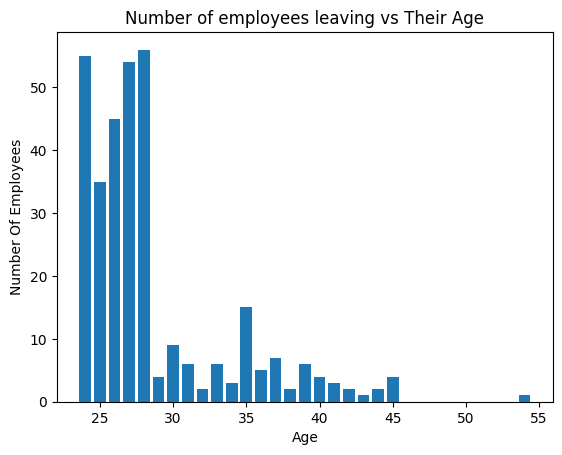

In [ ]:
plt.bar(bar_x,bar_y)
plt.title('Number of employees leaving vs Their Age')
plt.xlabel('Age')
plt.ylabel('Number Of Employees')

## Result of the trend noticed from graph
We can figure out that the people early in the age group are more willing to leave their designations  thus most number of employees in the age group of 20-30 are more likely to leave the job compared to higher age brackets

# Now let's see how does monthly income impacts people leaving job

In [ ]:
uni_ele2 = df['Monthly Income'].unique()
uni_ele2 = np.sort(uni_ele2)
# print(uni_ele2)
df_3 = df.groupby('Monthly Income')
# print(df_3)
count_l2 = []
for j in uni_ele2:
  count2 = df_3.get_group(j).shape[0]
  count_l2.append(count2)

count_l2

bar_x2 = uni_ele2
bar_y2 = count_l2
# print(bar_y2)
# print(bar_x2)

Text(0, 0.5, 'Number Of Employees')

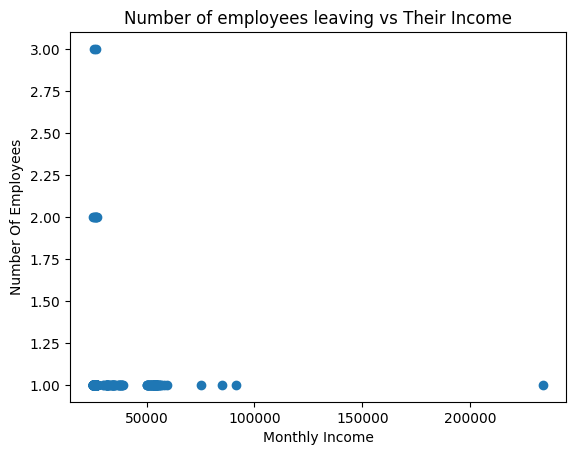

In [ ]:
plt.scatter(bar_x2,bar_y2)
plt.title('Number of employees leaving vs Their Income')
plt.xlabel('Monthly Income')
plt.ylabel('Number Of Employees')

Might be the scatter chart cannot give a good insight, might be because one point is too far off >200000 so if we remove that point then might be we can have a better distribution

In [ ]:
x = uni_ele2.max()
print(uni_ele2)
uni_ele2 = np.delete(uni_ele2,len(uni_ele2)-1)

[ 25010  25012  25021  25029  25037  25043  25048  25051  25057  25063
  25077  25102  25123  25136  25138  25166  25168  25184  25207  25208
  25218  25225  25232  25234  25239  25242  25247  25248  25252  25264
  25273  25295  25339  25348  25368  25370  25372  25373  25379  25388
  25390  25391  25393  25410  25418  25427  25433  25440  25453  25469
  25470  25473  25485  25487  25497  25524  25529  25535  25536  25546
  25549  25568  25586  25587  25589  25593  25601  25617  25630  25632
  25633  25635  25636  25658  25669  25670  25675  25678  25688  25692
  25702  25707  25710  25720  25724  25728  25733  25735  25738  25742
  25746  25765  25770  25775  25778  25789  25796  25810  25813  25815
  25818  25831  25839  25851  25878  25882  25888  25895  25904  25907
  25910  25918  25924  25940  25941  25948  25949  25950  25964  25970
  25978  25981  25982  25998  26010  26015  26027  26042  26050  26063
  26073  26100  26129  26137  26150  26159  26167  26176  26178  26210
  2621

[25010 25012 25021 25029 25037 25043 25048 25051 25057 25063 25077 25102
 25123 25136 25138 25166 25168 25184 25207 25208 25218 25225 25232 25234
 25239 25242 25247 25248 25252 25264 25273 25295 25339 25348 25368 25370
 25372 25373 25379 25388 25390 25391 25393 25410 25418 25427 25433 25440
 25453 25469 25470 25473 25485 25487 25497 25524 25529 25535 25536 25546
 25549 25568 25586 25587 25589 25593 25601 25617 25630 25632 25633 25635
 25636 25658 25669 25670 25675 25678 25688 25692 25702 25707 25710 25720
 25724 25728 25733 25735 25738 25742 25746 25765 25770 25775 25778 25789
 25796 25810 25813 25815 25818 25831 25839 25851 25878 25882 25888 25895
 25904 25907 25910 25918 25924 25940 25941 25948 25949 25950 25964 25970
 25978 25981 25982 25998 26010 26015 26027 26042 26050 26063 26073 26100
 26129 26137 26150 26159 26167 26176 26178 26210 26212 26216 26218 26219
 26236 26251 26260 26266 26282 26291 26304 26305 26307 26314 26320 26324
 26380 26386 26389 26409 26410 26413 26414 26416 26

Text(0, 0.5, 'Number Of Employees')

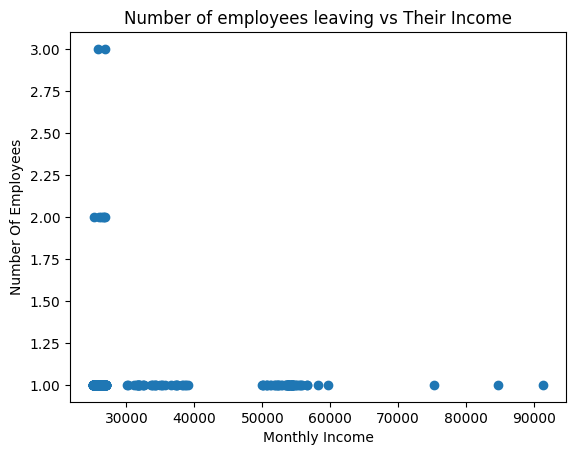

In [ ]:
df_3 = df.groupby('Monthly Income')
# print(df_3)
count_l2 = []
for j in uni_ele2:
  count2 = df_3.get_group(j).shape[0]
  count_l2.append(count2)

count_l2

bar_x2 = uni_ele2
# print(uni_ele2)
bar_y2 = count_l2

plt.scatter(bar_x2,bar_y2)
plt.title('Number of employees leaving vs Their Income')
plt.xlabel('Monthly Income')
plt.ylabel('Number Of Employees')

Although there was an improvement in the distribution but still it doesn't give a clear picture, but I can clearly see there's a distribution into 3 brackets : 20000-40000, 50000-60000 and >600000
So I can group accordingly!

<BarContainer object of 3 artists>

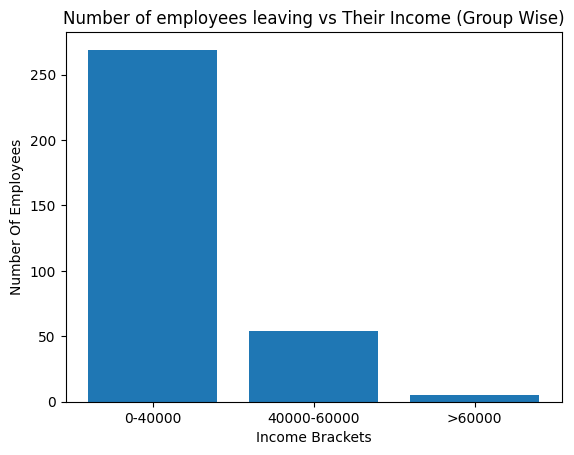

In [ ]:
l2 = []
l5 = []
l8 = []
for i in uni_ele2:
  # i = i.replace(" ","")
  j = i
  # print(i)
  if j<40000:
    l2.append(i)
  elif j<60000 and j>40000:
    l5.append(i)
  elif j>60000:
    l8.append(i)
X = [0,0,0]
for i in uni_ele2:
  if i in l2:
    count3 = df_3.get_group(i).shape[0]
    X[0]=X[0]+count3
  elif i in l5:
    count3 = df_3.get_group(i).shape[0]
    X[1]=X[1]+count3
  elif i in l8:
    count3 = df_3.get_group(i).shape[0]
    X[2] = X[2]+count3
X[2]= X[2]+1
Y = ['0-40000','40000-60000','>60000']

plt.title('Number of employees leaving vs Their Income (Group Wise)')
plt.xlabel('Income Brackets')
plt.ylabel('Number Of Employees')
plt.bar(Y,X)


Thus, somebody belonging to the income bracket of 0-40000 is more likely to leave the job than someone belonging to 40k-60k bracket, and somebody having salary >60000 is less likely to leave however without knowing what percent of employees have salary >60000 can give better insights

# Another important insight into the data will be seeking how long was the tenure of an employee leaving job

<BarContainer object of 3 artists>

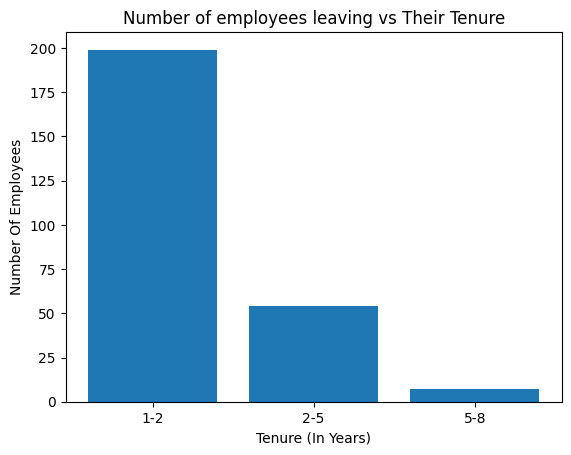

In [ ]:
uni_ele3 = df.Tenure.unique()
uni_ele3 = np.sort(uni_ele3)
df_4 = df.groupby('Tenure')
count_l3 = []
l2 = []
l5 = []
l8 = []
for i in uni_ele3:
  # i = i.replace(" ","")
  j = int(i[0])
  if j<2:
    l2.append(i)
  elif j<5 and j>2:
    l5.append(i)
  elif j>5:
    l8.append(i)
X = [0,0,0]
for i in uni_ele3:
  if i in l2:
    count3 = df_4.get_group(i).shape[0]
    X[0]=X[0]+count3
  elif i in l5:
    count3 = df_4.get_group(i).shape[0]
    X[1]=X[1]+count3
  elif i in l8:
    count3 = df_4.get_group(i).shape[0]
    X[2] = X[2]+count3

Y = ['0-2','2-5','5-8']

plt.title('Number of employees leaving vs Their Tenure')
plt.xlabel('Tenure (In Years)')
plt.ylabel('Number Of Employees')
plt.bar(Y,X)


So the trend is that a person early into company (0-2 year of tenure) is more likely to leave the position while those who have stayed in position (5-8) year are more less likely to leave which is a decent sign that people in company for long are not leaving

# Now, one of the most important things to figure out if why are people leaving their jobs?

Number 0 denotes Issues with the Manager
Number 1 denotes More Challenging Job Roles/ Higher designation
Number 2 denotes Lack of Growth
Number 3 denotes Better Salary
Number 4 denotes Absconding
Number 5 denotes Termination - Theft
Number 6 denotes Reasons not known
Number 7 denotes Higher education
Number 8 denotes Health Reasons
Number 9 denotes Termination - Poor Performance


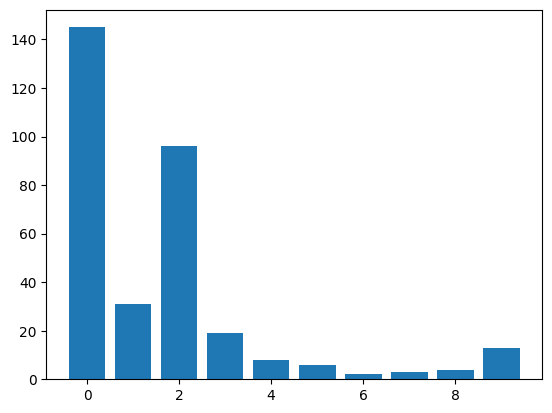

In [ ]:
uni_ele4 = df.Remarks.unique()
df_5 = df.groupby('Remarks')
count_l5 = []
for i in uni_ele4:
  x = df_5.get_group(i).shape[0]
  count_l5.append(x)

X_bar3 = []
for i in range(len(uni_ele4)):
  print(f'Number {i} denotes {uni_ele4[i]}')
  X_bar3.append(i)
Y_bar3 = count_l5

plt.bar(X_bar3,Y_bar3)
plt.show()

Now, this is depressing that most people are leaving the jobs because of issues with manager or lack of growth because this reveals internal issues within the organisation and this will lead to long term loss of talent but we also need to investigate what is the rating of employees that are leaving so that we can better access what is quality of talent lost

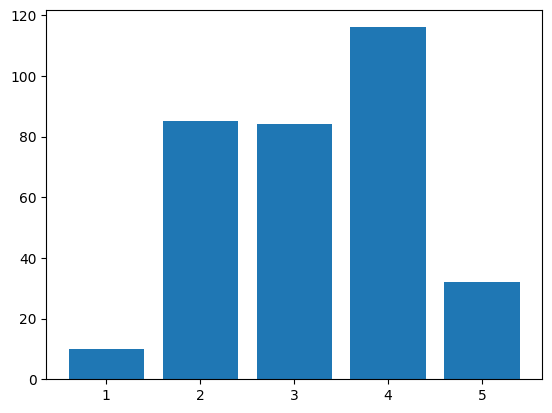

In [ ]:
uni_ele5 = df['Last Rating'].unique()
uni_ele5 = np.sort(uni_ele5)
df_6 = df.groupby('Last Rating')
count_l6 = []
for i in uni_ele5:
  x = df_6.get_group(i).shape[0]
  count_l6.append(x)

X_bar4 = uni_ele5
Y_bar4 = count_l6
plt.bar(X_bar4,Y_bar4)
plt.show()

Another depressing fact is that most of the talent lost from the company is from a 4 star and 3 star rating and least from 1 star rating which means that good people are leaving the company slowly this is brain drain and loss

# We must also try to understand why these people are leaving mostly

Number 0 denotes Issues with the Manager
Number 1 denotes Better Salary
Number 2 denotes Lack of Growth
Number 3 denotes More Challenging Job Roles/ Higher designation
Number 4 denotes Termination - Theft
Number 5 denotes Absconding
Number 6 denotes Higher education
Number 7 denotes Health Reasons
Number 8 denotes Termination - Poor Performance


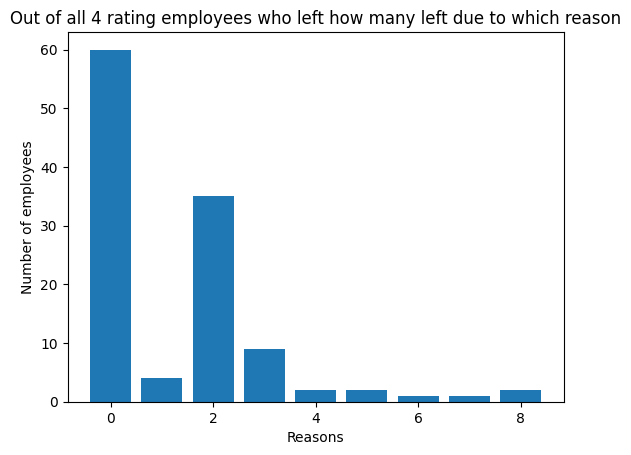

In [ ]:
rate_4 = df_6.get_group(4)
rate_4_n = rate_4.groupby('Remarks')
uni_rate_4 = rate_4['Remarks'].unique()
count = []
for i in uni_rate_4:
  x = rate_4_n.get_group(i).shape[0]
  count.append(x)

X_bar_5 = []
for i in range(len(uni_rate_4)):
  print(f'Number {i} denotes {uni_rate_4[i]}')
  X_bar_5.append(i)
Y_bar_5 = count

plt.title('Out of all 4 rating employees who left how many left due to which reason')
plt.ylabel('Number of employees')
plt.xlabel('Reasons')
plt.bar(X_bar_5,Y_bar_5)
plt.show()

Its shocking that most of the 4/5 rating employees are leaving due to issues with manager or lack of growth and this must be investigated!

Number 0 denotes Better Salary
Number 1 denotes Lack of Growth
Number 2 denotes Issues with the Manager
Number 3 denotes Absconding
Number 4 denotes Higher education
Number 5 denotes More Challenging Job Roles/ Higher designation
Number 6 denotes Termination - Theft
Number 7 denotes Termination - Poor Performance
Number 8 denotes Health Reasons


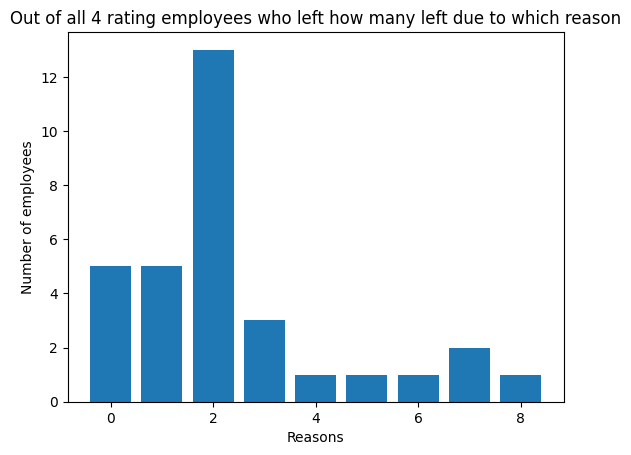

In [ ]:
rate_5 = df_6.get_group(5)
rate_5_n = rate_5.groupby('Remarks')
uni_rate_5 = rate_5['Remarks'].unique()
count1 = []
for i in uni_rate_5:
  x = rate_5_n.get_group(i).shape[0]
  count1.append(x)

X_bar_6 = []
for i in range(len(uni_rate_5)):
  print(f'Number {i} denotes {uni_rate_5[i]}')
  X_bar_6.append(i)
Y_bar_6 = count1

plt.title('Out of all 5 rating employees who left how many left due to which reason')
plt.ylabel('Number of employees')
plt.xlabel('Reasons')
plt.bar(X_bar_6,Y_bar_6)
plt.show()

This reveals that the top brass or say the 5/5 rating employees are also leaving due to issues with manager being the prime reason, managerial positions must be evaluated on performance and if found detrimental to company growth must be sacked

# Why are poor performing 1 star employees leaving? Let's figure out!

Number 0 denotes Termination - Theft
Number 1 denotes Lack of Growth
Number 2 denotes Issues with the Manager
Number 3 denotes Better Salary
Number 4 denotes Termination - Poor Performance


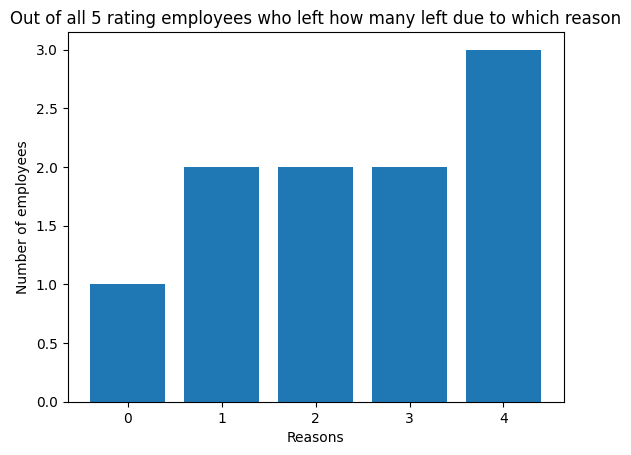

In [ ]:
rate_1 = df_6.get_group(1)
rate_1_n = rate_1.groupby('Remarks')
uni_rate_1 = rate_1['Remarks'].unique()
count1 = []
for i in uni_rate_1:
  x = rate_1_n.get_group(i).shape[0]
  count1.append(x)

X_bar_1 = []
for i in range(len(uni_rate_1)):
  print(f'Number {i} denotes {uni_rate_1[i]}')
  X_bar_1.append(i)
Y_bar_1 = count1

plt.title('Out of all 5 rating employees who left how many left due to which reason')
plt.ylabel('Number of employees')
plt.xlabel('Reasons')
plt.bar(X_bar_1,Y_bar_1)
plt.show()

So shocking that mostly they are being sacked than the resigning themselves! This goes on to show that mostly poor performing employees are staying back and also have less issue with manager but this is big loss to organisation

Trying to plot these two curves simultaneously

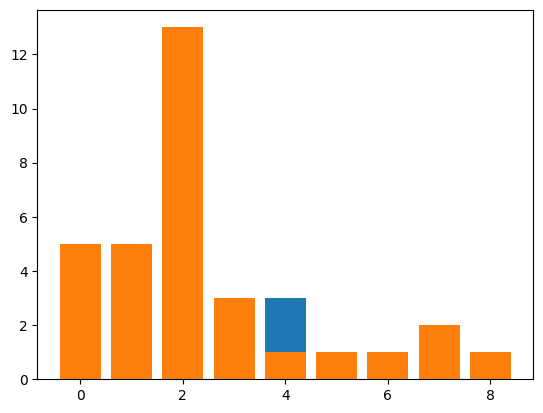

In [ ]:
plt.bar(X_bar_1,Y_bar_1)
plt.bar(X_bar_6,Y_bar_6)
plt.show()


# Which section or job profile is more likely to leave organisation

Number 0 denotes Sales Executive
Number 1 denotes Technical Services Officer
Number 2 denotes AM - Sales
Number 3 denotes Sales Executive 
Number 4 denotes Sr Sales Executive
Number 5 denotes Sr Sales Executive 
Number 6 denotes  Sales Executive
Number 7 denotes Regional Manager
Number 8 denotes Zonal Manager
Number 9 denotes National Sales Head


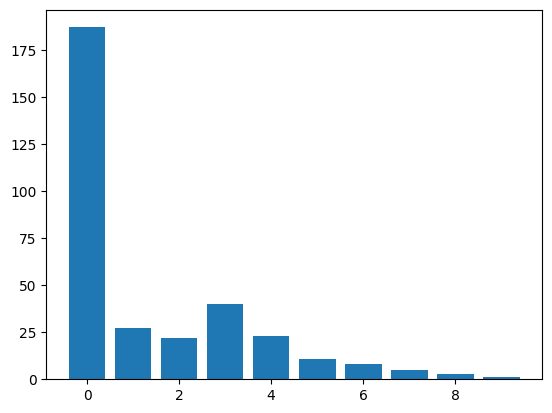

In [ ]:
df7 = df['Designation'].unique()
df_7 = df.groupby('Designation')
count_l7 = []
count7 = []
for i in df7:
  x = df_7.get_group(i).shape[0]
  count_l7.append(x)

for i in range(len(df7)):
  print(f'Number {i} denotes {df7[i]}')
  count7.append(i)


X_bar7 = count7
Y_bar7 = count_l7
plt.bar(X_bar7,Y_bar7)
plt.show()

So by a huge margin the sales executives are the ones to leave!

# Now let's see are new talents joining organisation competent enough or not by looking at their ratings


In [ ]:
df_a = df.Age.unique()
df_g = df.groupby('Age')
l = []
ratings = []
for i in df_a:
  if i<28 or i==28:
    l.append(i)
l.sort()
for i in l:
  df_r = df_g.get_group(i)['Last Rating'].unique()
  df_r = np.sort(df_r)
  df_r_g = df_g.get_group(i).groupby('Last Rating')
  count = []
  for j in df_r:
    x = df_r_g.get_group(j).shape[0]
    count.append(x)
  ratings.append(count)




[24, 25, 26, 27, 28]

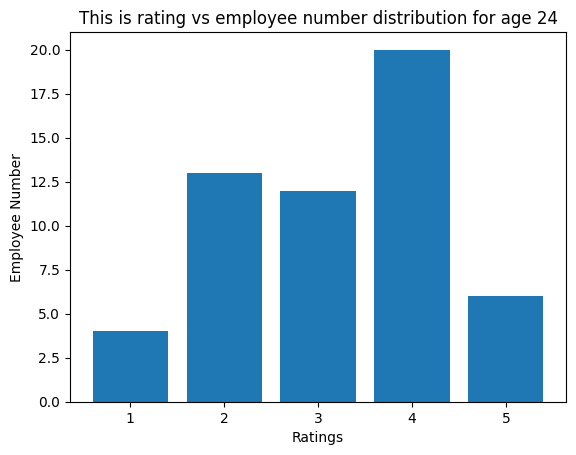

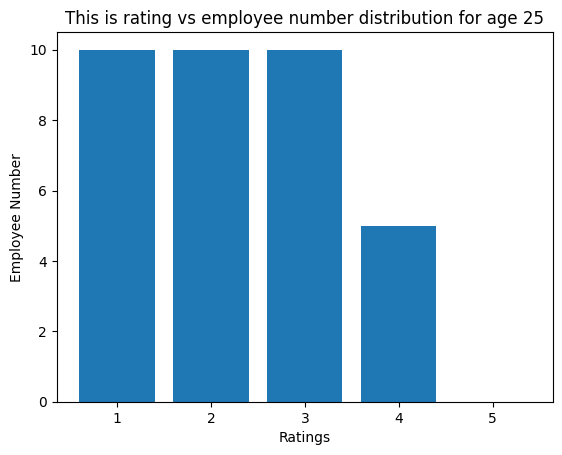

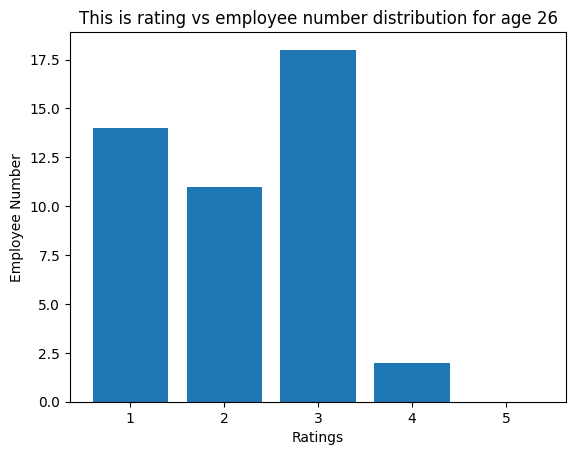

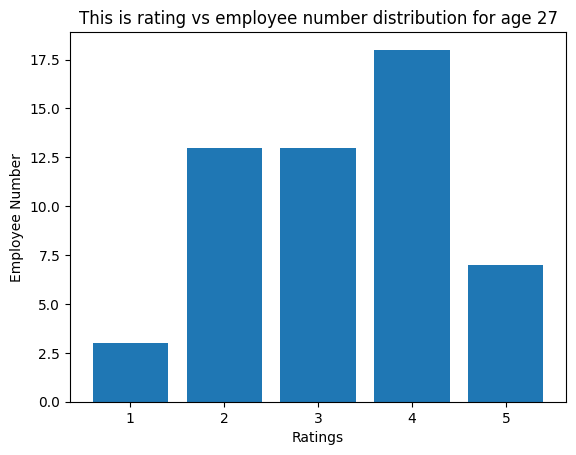

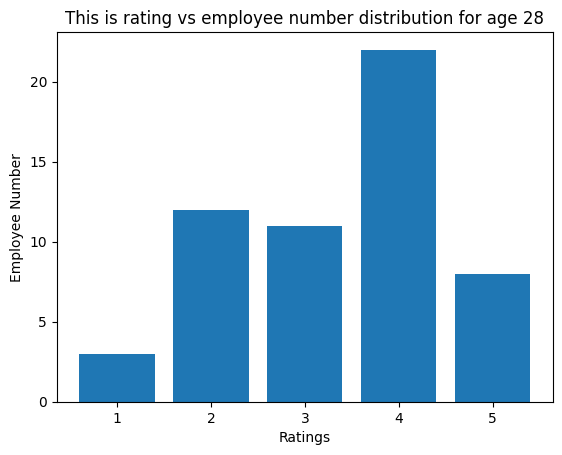

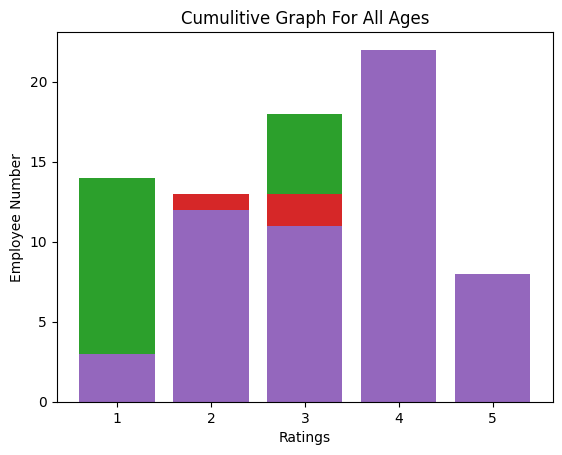

In [ ]:
Y = [1,2,3,4,5]
for i in range(len(l)):
  plt.title(f"This is rating vs employee number distribution for age {l[i]}")
  plt.xlabel('Ratings')
  plt.ylabel('Employee Number')
  X = ratings[i]
  n = len(X)
  if n<5:
    X.append(0)
  plt.bar(Y,X)
  plt.show()
  print()
  print()
for i in range(len(l)):
  plt.title("Cumulative Graph For All Ages")
  plt.xlabel('Ratings')
  plt.ylabel('Employee Number')
  X = ratings[i]
  n = len(X)
  if n<5:
    X.append(0)
  plt.bar(Y,X)
plt.show()

So as visible, at entry level age of 24 years most employees are having a rating of 4 however the rating distribution in early age bracket is not a very stark difference, getting a rating 5 employee is rare and visibly less frequent.

If we look at the graph that is cumulative of all others then we realise that although most employees have a rating of 4 the difference between rating 1,2,3,4 is not much.


In [ ]:
#Chalo That's it, that was the most I could capture

# Conclusion
I tried my best to analyse the data, this was my first time using the numpy, pandas and matplotlib and the experience along with the overall in class experience and the amount of hardwork visible by AI Club IIT Madras, is great and apart from the learnings I received on AI, I also gained insights on how such events could be planned and organised, I look forward to try to replicate these learnings when I get into organising committees at NIT Allahabad.

So, as per the analysis, the employees leaving the company:

1) Are independent of their income till its <6000 but >60000 there is a significant drop in people leaving the organisation which (if more data provided) could be attributed to simply there being only handful of people earning in that range

2) The young people in age groups of 24-30 are more likely to leave organisation than people who are above 30 and this can be attributed the fact that when we are young we have the capacity to hustle and frequently change companies until there comes a time when there's a need to settle in life

3) There are two major concerns for the firm to handle:
   i) Most of the employees leaving the firm are rated 3,4 and 5 which means that there's a significant brain drain in the firm because less number of people from rating 1 are leaving
   ii) Most of the employees of higher rating and overall most of the employees are leaving the firm because of issues with manager and due to lack of growth

4) The firm needs to keep a check on person to person relation between managers in the company's divisions and the subordinates of those managers because a lot of people are leaving the firm in agony aparently which not only spoils the name and image of company in hiring domains but also spoils the sentiment of public

5) The ratings of young people leaving the company indicate that  they were hired with an okaish system apparently because there is not much variation in ratings of employees in age group of 24-28 however the firm must run some courses to improve performance of 1 star and 2 star employees




In [ ]:
#The end!